In [361]:
import pandas as pd

In [362]:
data = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\Michelle\AppData\Local\Temp\ipykernel_9956\1926087617.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan_data_2007_2014.csv')


In [363]:
df = data.copy()

pd.options.display.max_columns = None
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## To reduce data dimension:

1. rid of variables that contain only NaN values;

In [365]:
df = df.dropna(axis=1, how='all')

df.shape

(466285, 58)

2. also remove data contain more than 70% NaN values;

In [366]:
null_stats = df.isna().sum().sort_values(ascending=False)
leakage_col = null_stats[null_stats > df.shape[0] * .7]

leakage_col

mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340304
dtype: int64

In [367]:
df = df.drop(columns=leakage_col.index.tolist())

df.shape

(466285, 55)

3. remove data contain only one-unique value;

In [368]:
df.nunique()

Unnamed: 0                    466285
id                            466285
member_id                     466285
loan_amnt                       1352
funded_amnt                     1354
funded_amnt_inv                 9854
term                               2
int_rate                         506
installment                    55622
grade                              7
sub_grade                         35
emp_title                     205475
emp_length                        11
home_ownership                     6
annual_inc                     31901
verification_status                3
issue_d                           91
loan_status                        9
pymnt_plan                         2
url                           466285
purpose                           14
title                          63098
zip_code                         888
addr_state                        50
dti                             3997
delinq_2yrs                       24
earliest_cr_line                 664
i

In [369]:
df = df.drop(columns=[col for col in df.columns if df[col].nunique() == 1], errors='ignore')

4. remove categorical column with high cardinality;

In [370]:
for col in df.select_dtypes(include='object').columns.tolist():
    value_counts_percentage = df[col].value_counts(normalize=True) * 100
    if any(value_counts_percentage > 80):
        print(col)
        df = df.drop(columns=col)

pymnt_plan
next_pymnt_d


5. remove column related to the borrower's basic identity (discrimination data);

In [371]:
identity_leakage_col = ['Unnamed: 0', 'id', 'member_id', 'url', 'title', 'desc', 'zip_code', 'addr_state', 'emp_title']

In [372]:
df = df.drop(columns=identity_leakage_col, errors='ignore')

6. remove numerical data higly correlated to target one;

In [373]:
import seaborn as sns
import matplotlib.pyplot as plt 

def corr_plot(df):
    corr_matrix = df.drop('loan_status', axis=1).select_dtypes(include=['float64', 'int64']).corr('spearman')
    plt.figure(figsize=(11,9))

    sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt='.2f', center=0, annot_kws={'size': 5})
    plt.show()

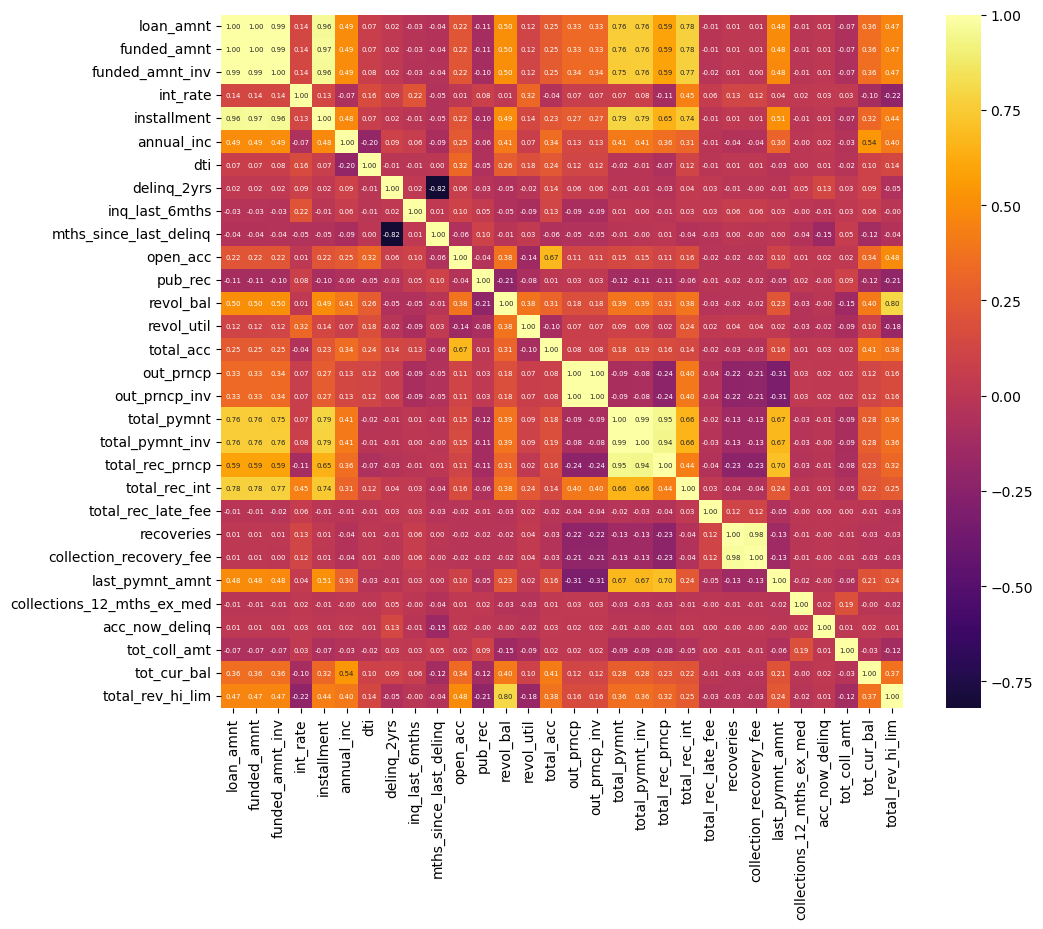

In [374]:
corr_plot(df)

In [375]:
import numpy as np

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
future_leakage_col = [column for column in upper.columns if any((upper[column] > 0.5) | (upper[column] < -0.5))]

future_leakage_col

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'mths_since_last_delinq',
 'revol_bal',
 'total_acc',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [376]:
df = df.drop(columns=future_leakage_col, errors='ignore')

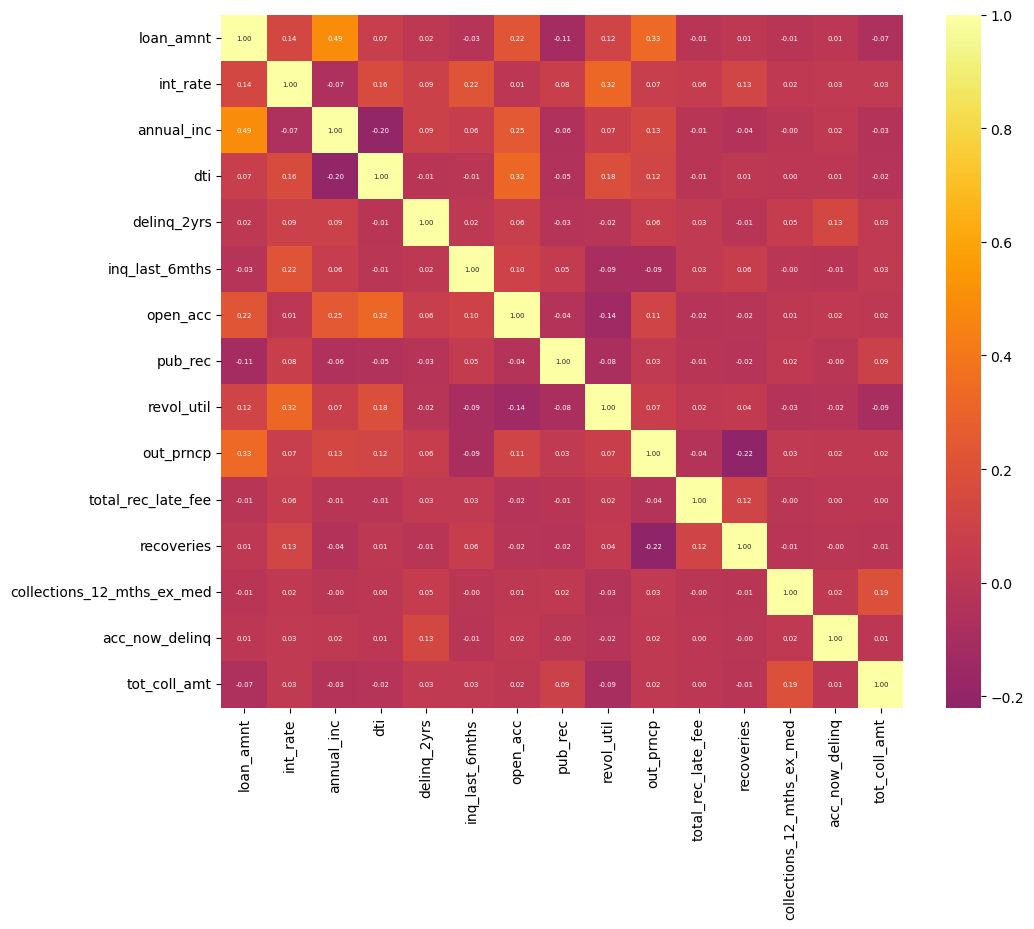

In [377]:
corr_plot(df)

In [378]:
df.shape

(466285, 28)

7. processing missing data;

In [379]:
df.isna().sum()

loan_amnt                         0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
purpose                           0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_util                      340
initial_list_status               0
out_prncp                         0
total_rec_late_fee                0
recoveries                        0
last_pymnt_d                    376
last_credit_pull_d               42
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                

In [380]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [381]:
import statistics

moda_na = statistics.mode(df.isna().sum()[df.isna().sum() > 0].tolist())
moda_na  # filling value does not affect distribution

29

In [382]:
def plot_original_vs_filled(df, col):
    
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))

    if pd.api.types.is_numeric_dtype(df[col]):
        # --- numerical ---
        sns.kdeplot(data=df[col], ax=ax[0], color='blue')
        ax[0].set_title('Original')
        ax[0].grid()
        ax[0].tick_params(axis='x', rotation=90)

        filled_na = df[col].fillna(df[col].median())
        sns.kdeplot(filled_na, ax=ax[1], color='blue')
        ax[1].set_title('Filled')
        ax[1].grid()
        ax[1].tick_params(axis='x', rotation=90)
    else:
        # --- categorical ---
        sns.countplot(x=df[col], ax=ax[0], order=df[col].value_counts().index, color='blue')
        ax[0].set_title('Original')
        ax[0].grid(axis='y')

        num_unique = df[col].nunique()
        
        if num_unique <= 30:
            ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='right')
        else:
            ax[0].set_xticklabels([])

        filled_na = df[col].fillna(df[col].mode()[0])
        sns.countplot(x=filled_na, ax=ax[1], order=filled_na.value_counts().index, color='blue')
        ax[1].set_title('Filled')
        ax[1].grid(axis='y')

        if num_unique <= 30:
            ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
        else:
            ax[1].set_xticklabels([])


    plt.tight_layout()
    plt.show()

- check for behavior of missing categorical data:

In [383]:
obj_cols = df.select_dtypes(include=['object']).loc[:, df.isna().sum() > moda_na].columns

obj_cols

Index(['emp_length', 'last_pymnt_d', 'last_credit_pull_d'], dtype='object')

In [384]:
df[obj_cols].isna().sum()

emp_length            21008
last_pymnt_d            376
last_credit_pull_d       42
dtype: int64

C:\Users\Michelle\AppData\Local\Temp\ipykernel_9956\3419368408.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='right')
C:\Users\Michelle\AppData\Local\Temp\ipykernel_9956\3419368408.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')


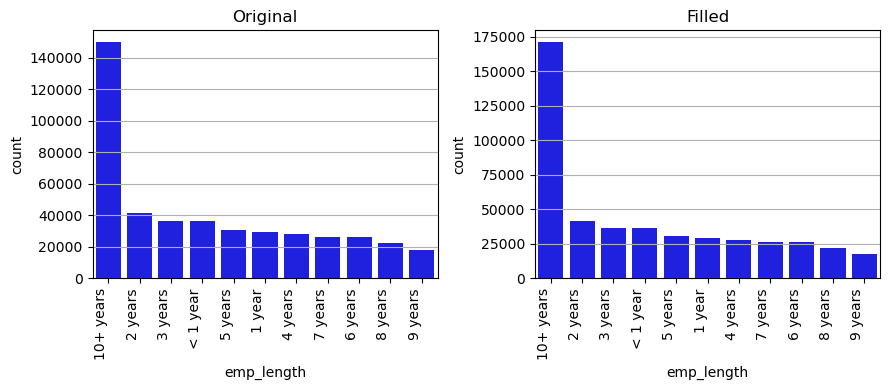

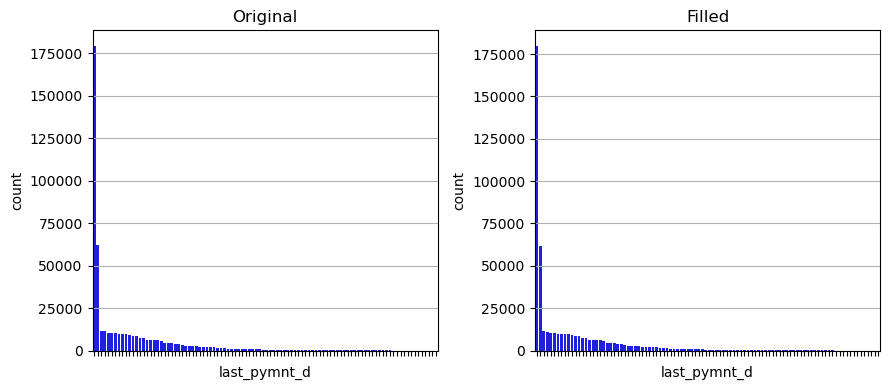

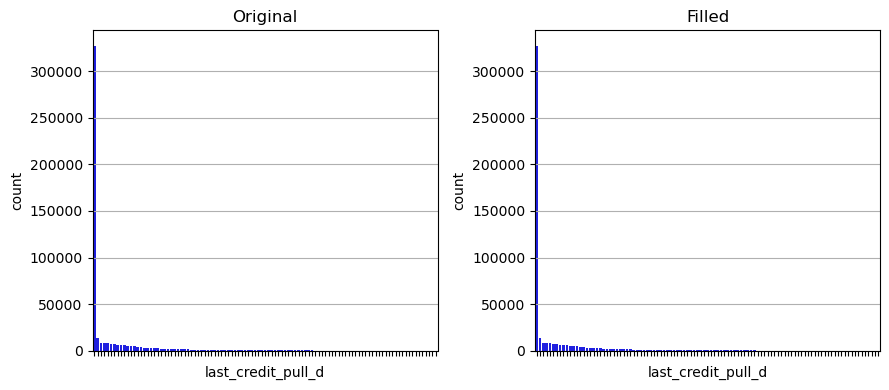

In [385]:
for col in obj_cols.tolist():
    plot_original_vs_filled(df, col)

- check for behavior of missing numerical data:

In [386]:
num_cols = df.select_dtypes(include=['float64', 'int64']).loc[:, df.isna().sum() > moda_na].columns

num_cols

Index(['revol_util', 'collections_12_mths_ex_med', 'tot_coll_amt'], dtype='object')

In [387]:
df[num_cols].isna().sum()

revol_util                      340
collections_12_mths_ex_med      145
tot_coll_amt                  70276
dtype: int64

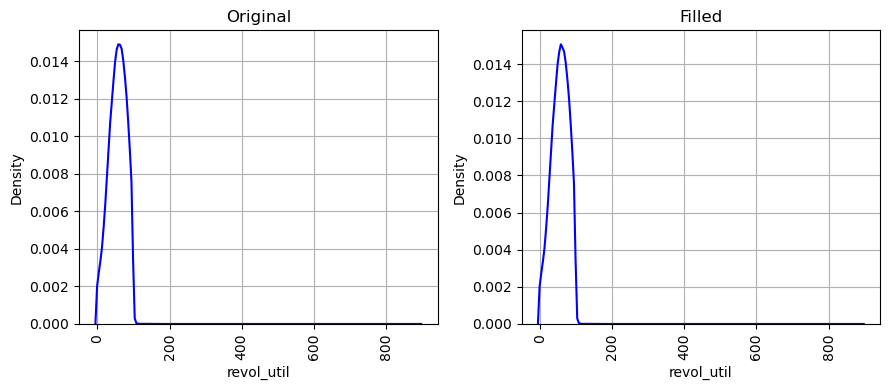

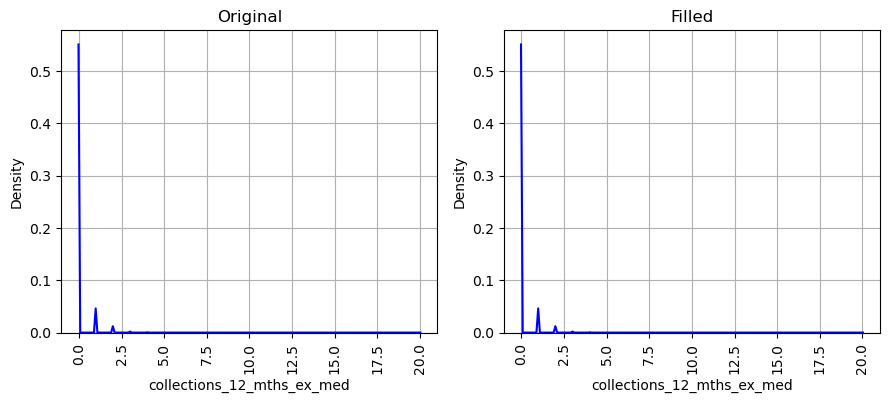

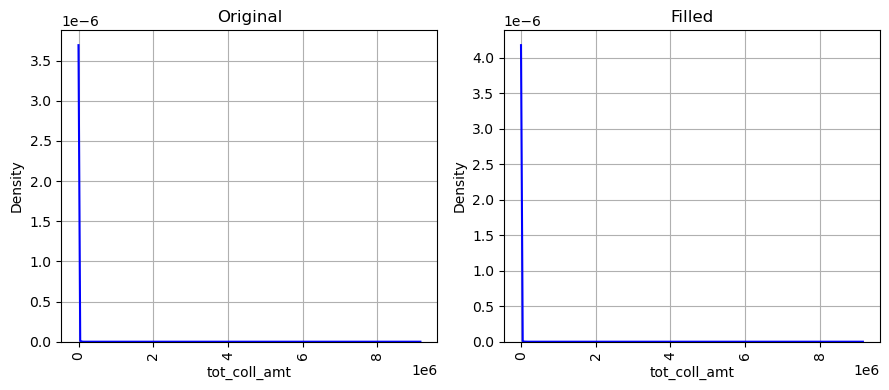

In [388]:
for col in num_cols.tolist():
    plot_original_vs_filled(df, col)

- fill missing data, knowing that density won't be changed:

In [389]:
import statistics

missval_cols = [col for col in df.columns if df[col].isna().sum() > 0]

for col in missval_cols:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)
        
missval_cols

C:\Users\Michelle\AppData\Local\Temp\ipykernel_9956\284490985.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Michelle\AppData\Local\Temp\ipykernel_9956\284490985.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

['emp_length',
 'annual_inc',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt']

In [390]:
df.isna().sum().sum()

np.int64(0)

In [391]:
df.shape

(466285, 28)

8. convert the target variable to binary mode (bad/good borrower);

In [392]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [393]:
#Current – the loan is still being serviced, In Grace Period – technical delay (5–15 days), it is also unclear how this will end.

df = df[~df['loan_status'].isin(['Current', 'In Grace Period'])] 

In [394]:
df['loan_status'] = np.where(df['loan_status'].isin(['Charged Off',
                                                     'Default',
                                                     'Does not meet the credit policy. Status:Charged Off',
                                                     'Late (31-120 days)',
                                                     'Late (16-30 days)']), 0, 1)
df['loan_status']

0         1
1         0
2         1
3         1
5         1
         ..
466276    0
466277    0
466278    1
466281    0
466283    1
Name: loan_status, Length: 238913, dtype: int64

9. pre-processing continues data:

In [395]:
df[df.select_dtypes(include=['object']).columns.tolist()].nunique()

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           6
verification_status      3
issue_d                 91
purpose                 14
earliest_cr_line       634
initial_list_status      2
last_pymnt_d            98
last_credit_pull_d     103
dtype: int64

- convert all possible object data to numerical type;

In [396]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [397]:
df['term'] = df['term'].str.replace(' ', '').str.replace('months', '')
df['term'] = pd.to_numeric(df['term'], errors='coerce')

df['term'].unique()

array([36, 60])

In [398]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [399]:
df['emp_length'] = df['emp_length'].str.replace('+', '').str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace('< 1 year', str(0))
df['emp_length'] = df['emp_length'].str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace(' year', '')
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce') 

df['emp_length'].unique()

array([10,  0,  3,  9,  4,  5,  1,  6,  2,  7,  8])

- obtain information related to the number of months that have passed since last record year (convert variable to quantitative type);

In [400]:
import re

pattern = re.compile(r"^[A-Za-z]{3}-\d{2}$")

time_data = []

for col in df.select_dtypes(include=['object']).columns:
    sample_values = df[col].dropna().astype(str).head(20)
    matches = sample_values.apply(lambda x: bool(pattern.match(x)))
    if matches.mean() > 0.8:
        time_data.append(col)

time_data

['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [401]:
from dateutil.relativedelta import relativedelta

def months_since(df, feature_name):
    df[feature_name] = pd.to_datetime(df[feature_name], format='%b-%y', errors='coerce')
    reference_date = pd.to_datetime('2017-12-01')
    
    def diff_in_months(d):
        if pd.isna(d):
            return None
        rd = relativedelta(reference_date, d)
        return rd.years * 12 + rd.months
    
    df[f'mths_since_{feature_name}'] = df[feature_name].apply(diff_in_months)
    
    mask_negative = df[f'mths_since_{feature_name}'] < 0
    if mask_negative.any():
        max_val = df[f'mths_since_{feature_name}'].max()
        df.loc[mask_negative, f'mths_since_{feature_name}'] = max_val
        
    return df

In [402]:
for col in time_data:
    months_since(df, col)

In [403]:
df = df.drop(columns=time_data, axis=1)

In [404]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,initial_list_status,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,5000,36,10.65,B,B2,10,RENT,24000.0,Verified,1,credit_card,27.65,0.0,1.0,3.0,0.0,83.7,f,0.0,0.00,0.00,0.0,0.0,0.0,72,395,35,23
1,2500,60,15.27,C,C4,0,RENT,30000.0,Source Verified,0,car,1.00,0.0,5.0,3.0,0.0,9.4,f,0.0,0.00,117.08,0.0,0.0,0.0,72,224,56,51
2,2400,36,15.96,C,C5,10,RENT,12252.0,Not Verified,1,small_business,8.72,0.0,2.0,2.0,0.0,98.5,f,0.0,0.00,0.00,0.0,0.0,0.0,72,193,42,23
3,10000,36,13.49,C,C1,10,RENT,49200.0,Source Verified,1,other,20.00,0.0,1.0,10.0,0.0,21.0,f,0.0,16.97,0.00,0.0,0.0,0.0,72,262,35,35
5,5000,36,7.90,A,A4,3,RENT,36000.0,Source Verified,1,wedding,11.20,0.0,3.0,9.0,0.0,28.3,f,0.0,0.00,0.00,0.0,0.0,0.0,72,157,35,27


In [405]:
df.describe()

,loan_amnt,term,int_rate,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
count,238913.000000,238913.000000,238913.000000,238913.000000,2.389130e+05,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,2.389130e+05,238913.000000,238913.000000,238913.000000,238913.000000
mean,13486.214647,41.268261,13.855453,5.952761,7.192851e+04,0.781569,16.439675,0.248270,0.906748,10.858220,0.134915,54.998363,375.020566,0.938372,166.565761,0.005935,0.002896,1.449232e+02,57.626035,239.211077,38.957767,30.853926
std,8066.725464,9.933987,4.380770,3.636743,5.510376e+04,0.413182,7.698582,0.735833,1.173727,4.827488,0.421414,24.659442,2329.745202,6.331726,762.644734,0.083796,0.058514,1.877610e+04,16.433964,83.140599,14.117226,12.288428
min,500.000000,36.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,36.000000,73.000000,23.000000,23.000000
25%,7200.000000,36.000000,10.990000,3.000000,4.500000e+04,1.000000,10.720000,0.000000,0.000000,7.000000,0.000000,37.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,45.000000,183.000000,29.000000,23.000000
50%,12000.000000,36.000000,13.670000,6.000000,6.146200e+04,1.000000,16.140000,0.000000,1.000000,10.000000,0.000000,56.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,54.000000,223.000000,35.000000,25.000000
75%,18000.000000,36.000000,16.590000,10.000000,8.600000e+04,1.000000,21.880000,0.000000,1.000000,13.000000,0.000000,74.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,65.000000,280.000000,45.000000,34.000000
max,35000.000000,60.000000,26.060000,10.000000,7.141778e+06,1.000000,39.990000,29.000000,33.000000,76.000000,11.000000,892.300000,32160.380000,358.680000,33520.270000,6.000000,5.000000,9.152545e+06,126.000000,587.000000,120.000000,127.000000


10. save resulted dataset;

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238913 entries, 0 to 466283
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      238913 non-null  int64  
 1   term                           238913 non-null  int64  
 2   int_rate                       238913 non-null  float64
 3   grade                          238913 non-null  object 
 4   sub_grade                      238913 non-null  object 
 5   emp_length                     238913 non-null  int64  
 6   home_ownership                 238913 non-null  object 
 7   annual_inc                     238913 non-null  float64
 8   verification_status            238913 non-null  object 
 9   loan_status                    238913 non-null  int64  
 10  purpose                        238913 non-null  object 
 11  dti                            238913 non-null  float64
 12  delinq_2yrs                    2389

In [407]:
df.to_csv('preprocessed_data.csv', index=False)